In [1]:
from pymongo import MongoClient
import pickle
import pandas as pd
import pandas
from itertools import chain
import numpy as np

from bson import json_util, ObjectId
import json

import re
from datetime import datetime

import matplotlib.pyplot as plt
client = MongoClient()
client.list_database_names()

['admin', 'config', 'local', 'ted']

In [2]:
json_normalize = pd.json_normalize

In [3]:
db = client.ted
db.list_collection_names()

['ted_stats_new',
 'ted_stats',
 'ted_comments_new',
 'ted_transcript_new',
 'ted_comments_old',
 'ted_transcript_old']

In [4]:
cursor = db.ted_stats_new.find({}, {'_id':0, 'items':1})

In [5]:
df =  pd.DataFrame(list(cursor))

In [6]:
df.shape

(3212, 1)

In [7]:

df.head()

,items
0,[]
1,"[{'kind': 'youtube#video', 'etag': 'jfWnt-mcuP..."
2,"[{'kind': 'youtube#video', 'etag': 'yQZrqMvqqe..."
3,"[{'kind': 'youtube#video', 'etag': '_9RNdlPGVI..."
4,"[{'kind': 'youtube#video', 'etag': '3WAFW6NU6s..."


In [8]:
new_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['items']])

In [9]:

new_df.columns

Index(['kind', 'etag', 'id', 'snippet.publishedAt', 'snippet.channelId',
       'snippet.title', 'snippet.description',
       'snippet.thumbnails.default.url', 'snippet.thumbnails.default.width',
       'snippet.thumbnails.default.height', 'snippet.thumbnails.medium.url',
       'snippet.thumbnails.medium.width', 'snippet.thumbnails.medium.height',
       'snippet.thumbnails.high.url', 'snippet.thumbnails.high.width',
       'snippet.thumbnails.high.height', 'snippet.thumbnails.standard.url',
       'snippet.thumbnails.standard.width',
       'snippet.thumbnails.standard.height', 'snippet.thumbnails.maxres.url',
       'snippet.thumbnails.maxres.width', 'snippet.thumbnails.maxres.height',
       'snippet.channelTitle', 'snippet.tags', 'snippet.categoryId',
       'snippet.liveBroadcastContent', 'snippet.defaultLanguage',
       'snippet.localized.title', 'snippet.localized.description',
       'contentDetails.duration', 'contentDetails.dimension',
       'contentDetails.definition', '

In [10]:

new_df.shape

(2847, 43)

In [11]:
new_df_select = new_df[['id',
                        'snippet.tags',
                        'snippet.title',
                        'snippet.publishedAt',
                        'statistics.commentCount', 
                        
                        'statistics.likeCount',
                        'statistics.viewCount'
                       ]]


In [12]:

new_df_select.sample(5)

,id,snippet.tags,snippet.title,snippet.publishedAt,statistics.commentCount,statistics.likeCount,statistics.viewCount
0,_uUskajC1Ps,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Ideas Change Everything — and What’s Next for ...,2024-04-09T18:33:22Z,28,547,27754
0,v19OlWvdUSg,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...","A skateboard, with a boost | Sanjay Dastoor",2013-04-02T15:19:23Z,999,5416,584964
0,U9d0p96N1iw,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",How AI Models Steal Creative Work — and What t...,2025-03-19T11:00:40Z,287,2155,68708
0,H8rDS6Wto5g,"[TEDTalk, TEDTalks, The Way We Work, business,...",7 common questions about workplace romance | T...,2019-02-09T14:29:02Z,198,3655,300472
0,iE9HMudybyc,"[TEDTalk, TEDTalks, TED Talk, TED Talks, TED, ...",Nilofer Merchant: Got a meeting? Take a walk,2013-04-29T15:19:04Z,195,7714,634077


In [13]:
new_df_select['snippet.publishedAt'] = pd.to_datetime(new_df_select['snippet.publishedAt'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\3048775952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['snippet.publishedAt'] = pd.to_datetime(new_df_select['snippet.publishedAt'])


In [14]:
new_df_select['snippet.tags'].values[0]

['JR',
 'TED',
 'TEDTalks',
 'TED2011',
 'TED Prize',
 'TED Prize wish',
 'art',
 'artwork',
 'artist',
 'posters',
 'take a stand',
 'turn the world inside out',
 'change',
 'project',
 'change the world',
 'graffiti',
 'canvas',
 'photos',
 'photography',
 'photo',
 'photographer',
 'camera',
 'gallery',
 'sidewalk gallery',
 'pasted',
 'media',
 'public',
 'public art',
 'Rio de Janeiro',
 'Paris',
 'images',
 'image',
 'imagery',
 'portraits',
 'story',
 'France',
 'world',
 'perception',
 'French street artist',
 'guerrilla artist',
 'faces',
 'caricature',
 'slums of Kenya',
 'Africa',
 'streets',
 'riot',
 'slum',
 'ghetto',
 'adventure',
 'rooftop']

In [15]:

#new_df_select['snippet.tags'].values[0].remove(['TEDTalk'])
mylist = ['TEDTalk', 'TEDTalks', 'TED Talk', 'TED Talks', 'TED', 'TEDx', 'TED Residency', 'TED en Español',
         'TEDSalon NY2015', 'TED Books', 'TED Fellows', 'TEDxToronto', 'TEDGlobal', 'TEDxPhoenix', 'TED2004', 'TED2015',
         'TED@NYC', 'TED (Organization)', 'TED Prize', 'TED Talks (video)', 'TEDxBend', 'TED Fellow', 
         '\TED', 'Talk\\', 'Talks\\', 'TED Institute', 'TED@BCG', 'TEDxIndianapolis', 'TEDxABQ', 'TED University', 
         'TEDGlobal 2012', 'TED Global', 'about TEDTalks', 'what is TED', 'what are TEDTalks', 'TEDGlobal2012',
         'TED Global 2012', 'TED@250', 'TEDMED']
for i in mylist:
    for v in range(new_df_select.shape[0]):
        if i in new_df_select['snippet.tags'].values[v]: 
            new_df_select['snippet.tags'].values[v].remove(i)
    
#new_df_select['snippet.tags'].values[0]

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\2174585042.py:5: SyntaxWarning: invalid escape sequence '\T'
  '\TED', 'Talk\\', 'Talks\\', 'TED Institute', 'TED@BCG', 'TEDxIndianapolis', 'TEDxABQ', 'TED University',


In [16]:
new_df_select['snippet.tags'].values[0]

['JR',
 'TED2011',
 'TED Prize wish',
 'art',
 'artwork',
 'artist',
 'posters',
 'take a stand',
 'turn the world inside out',
 'change',
 'project',
 'change the world',
 'graffiti',
 'canvas',
 'photos',
 'photography',
 'photo',
 'photographer',
 'camera',
 'gallery',
 'sidewalk gallery',
 'pasted',
 'media',
 'public',
 'public art',
 'Rio de Janeiro',
 'Paris',
 'images',
 'image',
 'imagery',
 'portraits',
 'story',
 'France',
 'world',
 'perception',
 'French street artist',
 'guerrilla artist',
 'faces',
 'caricature',
 'slums of Kenya',
 'Africa',
 'streets',
 'riot',
 'slum',
 'ghetto',
 'adventure',
 'rooftop']

In [17]:
pd.DataFrame(new_df_select['snippet.tags'].tolist(), index= new_df_select.index).add_prefix('tag_')

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,...,tag_39,tag_40,tag_41,tag_42,tag_43,tag_44,tag_45,tag_46,tag_47,tag_48
0,JR,TED2011,TED Prize wish,art,artwork,artist,posters,take a stand,turn the world inside out,change,...,slums of Kenya,Africa,streets,riot,slum,ghetto,adventure,rooftop,None,None
0,NedraGloverTawwab,Business,Upwork,relationships,boundaries,work,work boundaries,The Way We Work,A TED Series,mental health,...,None,None,None,None,None,None,None,None,None,None
0,climate change,environment,global issues,sustainability,food,Africa,community,agriculture,farming,countdown,...,None,None,None,None,None,None,None,None,None,None
0,TED Women,Maja Bosnic,Maja Bosnic TED,Maja Bosnic TED Talk,global issues,economics,social change,gender,leadership,women,...,None,None,None,None,None,None,None,None,None,None
0,technology,design,invention,innovation,robots,animals,nature,future,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Quantum Physics,Computers,Science,Future,Technology,Innovation,Invention,Encryption,Physics,Medicine,...,None,None,None,None,None,None,None,None,None,None
0,Steven,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,Climate Change,Science,Culture,Psychology,Mind,Personality,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
0,culture,technology,design,entertainment,communication,community,Ideas,Chris Anderson,Monique Ruff-Bell,None,...,None,None,None,None,None,None,None,None,None,None


In [18]:

new_df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2847 entries, 0 to 0
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   id                       2847 non-null   object             
 1   snippet.tags             2847 non-null   object             
 2   snippet.title            2847 non-null   object             
 3   snippet.publishedAt      2847 non-null   datetime64[ns, UTC]
 4   statistics.commentCount  2805 non-null   object             
 5   statistics.likeCount     2774 non-null   object             
 6   statistics.viewCount     2847 non-null   object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 177.9+ KB


In [19]:

new_df_select.columns

Index(['id', 'snippet.tags', 'snippet.title', 'snippet.publishedAt',
       'statistics.commentCount', 'statistics.likeCount',
       'statistics.viewCount'],
      dtype='object')

In [20]:
new_df_select.rename(columns={'id':'video_id', 'snippet.tags':'tags', 'snippet.title': 'title',
                             'statistics.commentCount':'comments_count', 'statistics.dislikeCount':'dislike_count',
                             'statistics.likeCount':'like_count', 'statistics.viewCount':'views_count',
                             'snippet.publishedAt':'publushed_date'}, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\743335426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select.rename(columns={'id':'video_id', 'snippet.tags':'tags', 'snippet.title': 'title',


In [21]:

new_df_select.head(10)

,video_id,tags,title,publushed_date,comments_count,like_count,views_count
0,0PAy1zBtTbw,"[JR, TED2011, TED Prize wish, art, artwork, ar...",Use art to turn the world inside out | JR,2011-03-05 02:37:08+00:00,250,10167,780514
0,4SCrXqbhmCY,"[NedraGloverTawwab, Business, Upwork, relation...",Your 3-Step Guide to Setting Better Boundaries...,2023-03-15 14:55:06+00:00,57,2556,106966
0,tWZmunAvlMM,"[climate change, environment, global issues, s...",Lessons From People Already Adapting to the Cl...,2024-07-05 11:01:02+00:00,83,1197,40872
0,vO5Rio_skIU,"[TED Women, Maja Bosnic, Maja Bosnic TED, Maja...",How to Share Public Money Fairly | Maja Bosnic...,2022-03-28 15:00:38+00:00,91,NaN,47235
0,AI7M-JTC6_w,"[technology, design, invention, innovation, ro...","The incredible potential of flexible, soft rob...",2018-07-05 20:36:20+00:00,215,5436,215795
0,yfLp_vueUxY,"[Health, Personal Growth, Addiction, Public He...","The past, present and future of nicotine addic...",2020-01-22 22:39:27+00:00,403,2992,125252
0,MeKJK4uetL8,"[Math, Communication, Visualizations, Social C...",An unexpected tool for understanding inequalit...,2019-04-09 14:48:41+00:00,411,1934,95183
0,Rk5C149J9C0,"[entertainment, time, work, brain, comedy, vis...",Why you procrastinate -- and how to still get ...,2021-07-17 14:00:07+00:00,279,8778,382334
0,MG5-xZLTuVs,"[Violence, Guns, Big Problems, Activism, Media...",Stop making mass shooters famous | Tom Teves,2020-08-18 16:53:59+00:00,318,2977,64651
0,KNEGWrD08f8,"[technology, education, parenting, mental heal...",Are Smartphones Ruining Childhood? | Jonathan ...,2024-09-14 11:00:20+00:00,179,1791,75606


In [22]:
new_df_select['today'] = pd.Timestamp.now()  # Includes current date and time


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\3777594088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['today'] = pd.Timestamp.now()  # Includes current date and time


In [23]:
new_df_select['publushed_date'] = new_df_select['publushed_date'].dt.tz_convert(None)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\2755687937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['publushed_date'] = new_df_select['publushed_date'].dt.tz_convert(None)


In [24]:
new_df_select['days_age'] = (new_df_select['today'] - new_df_select['publushed_date']).dt.days

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\3582916321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['days_age'] = (new_df_select['today'] - new_df_select['publushed_date']).dt.days


In [25]:
new_df_select['views_per_day'] = new_df_select['views_count'].astype(int)/new_df_select['days_age']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4180\2528974701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_select['views_per_day'] = new_df_select['views_count'].astype(int)/new_df_select['days_age']


In [26]:

new_df_select = new_df_select[new_df_select['like_count'].notna()]

In [27]:
new_df_select['success'] = np.where((new_df_select['like_count']).astype(int) > 10000, 'yes', 'no')

In [28]:

def get_first_tag(column = new_df_select['tags']):
    first_tags = []
    for i in range(column.shape[0]):
        if len(column.values[i]) > 0:
            first_tags.append(column.values[i][0])
        else:
            first_tags.append('no_tags')
    return first_tags

In [29]:

new_df_select['prime_tag'] = get_first_tag(column = new_df_select['tags'])

(array([ 687.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2087.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

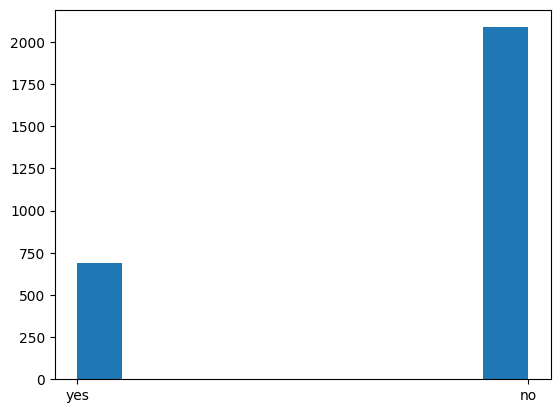

In [30]:

plt.hist(new_df_select['success'])

In [31]:

with open('ted_video_stats_new.pkl', 'wb') as picklefile:
    pickle.dump(new_df_select, picklefile)